# **CRAFTING A PRICING STRATEGY**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [12]:
def get_new_prices(market_prices,strategy):
    new_prices_list = []
    for i in range(len(strategy)):
        new_prices_list.append(int(market_prices[market_prices.columns[i]].quantile(strategy[i]/100)))
    new_prices_dict = {k: v for k, v in zip(list(market_prices.columns),new_prices_list)}
    df_new_prices = pd.DataFrame([new_prices_dict])
    return df_new_prices

In [13]:
market_prices = pd.read_csv("clean_arcodeltriunfo_2024-07-20.csv")

In [14]:
far_high_strategy = [39,41,43,45,47,49,51,53,55,57]
median_strategy = [50,50,50,50,50,50,50,50,50,50]
p35_strategy = [35,35,35,35,35,35,35,35,35,35]
len(p35_strategy)

10

In [15]:
df_new_prices = get_new_prices(market_prices,far_high_strategy)

In [16]:
#4 INPUT YOUR PROPERTY PRICES ADR NEXT 10 MONTH PRICES
current_prices = {
    'september': 282,
    'october': 215,
    'november': 169,
    'december': 199,
    'january': 168,
    'february': 207,
    'march': 234,
    'april': 249,
    'may': 258,
    'june': 293,
}

df_current_prices = pd.DataFrame([current_prices])

In [17]:
df_current_prices

,september,october,november,december,january,february,march,april,may,june
0,282,215,169,199,168,207,234,249,258,293


In [18]:
df_new_prices

,september,october,november,december,january,february,march,april,may,june
0,278,297,221,215,238,259,297,295,328,323


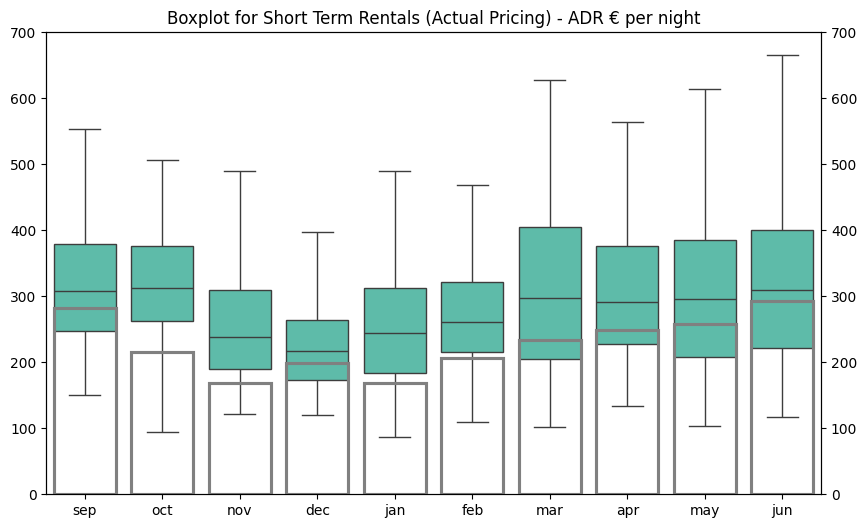

In [19]:
#ACTUAL PRICES
fig, ax1 = plt.subplots(figsize=(10, 6))
custom_color = (79 / 255, 202 / 255, 179 / 255)
sns.boxplot(data=market_prices, orient="v", ax=ax1,showfliers=False,color = custom_color)
ax1.set_ylim(0, 700)
ax2 = ax1.twinx()
sns.barplot(data=df_current_prices, fill=None, color='gray')
ax2.set_ylim(0, 700)
ax1.set_xticklabels([label.get_text()[:3] for label in ax1.get_xticklabels()])
plt.title('Boxplot for Short Term Rentals (Actual Pricing) - ADR € per night')
plt.show()

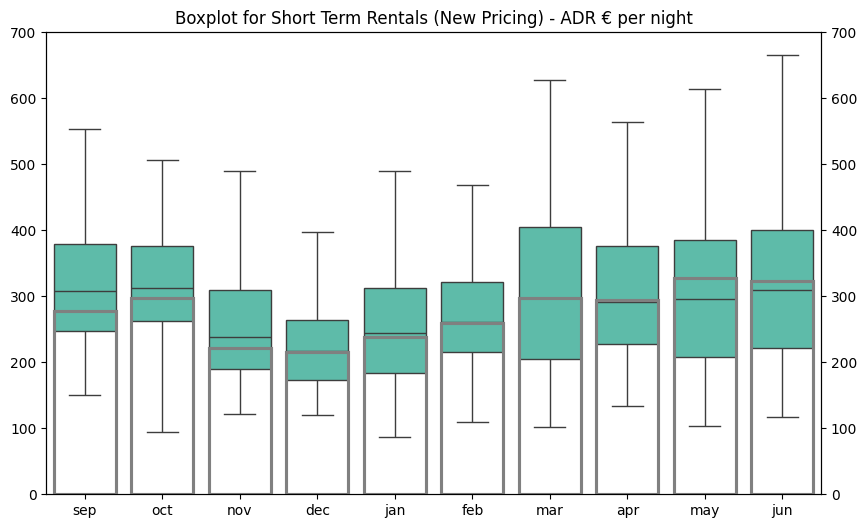

In [20]:
#NEW PRICES
fig, ax1 = plt.subplots(figsize=(10, 6))
custom_color = (79 / 255, 202 / 255, 179 / 255)
sns.boxplot(data=market_prices, orient="v", ax=ax1,showfliers=False,color = custom_color)
ax1.set_ylim(0, 700)
ax2 = ax1.twinx()
sns.barplot(data=df_new_prices, fill=None, color='gray')
ax2.set_ylim(0, 700)
ax1.set_xticklabels([label.get_text()[:3] for label in ax1.get_xticklabels()])
plt.title('Boxplot for Short Term Rentals (New Pricing) - ADR € per night')
plt.show()

array([[<Axes: title={'center': 'september'}>,
        <Axes: title={'center': 'october'}>,
        <Axes: title={'center': 'november'}>],
       [<Axes: title={'center': 'december'}>,
        <Axes: title={'center': 'january'}>,
        <Axes: title={'center': 'february'}>],
       [<Axes: title={'center': 'march'}>,
        <Axes: title={'center': 'april'}>,
        <Axes: title={'center': 'may'}>],
       [<Axes: title={'center': 'june'}>, <Axes: >, <Axes: >]],
      dtype=object)

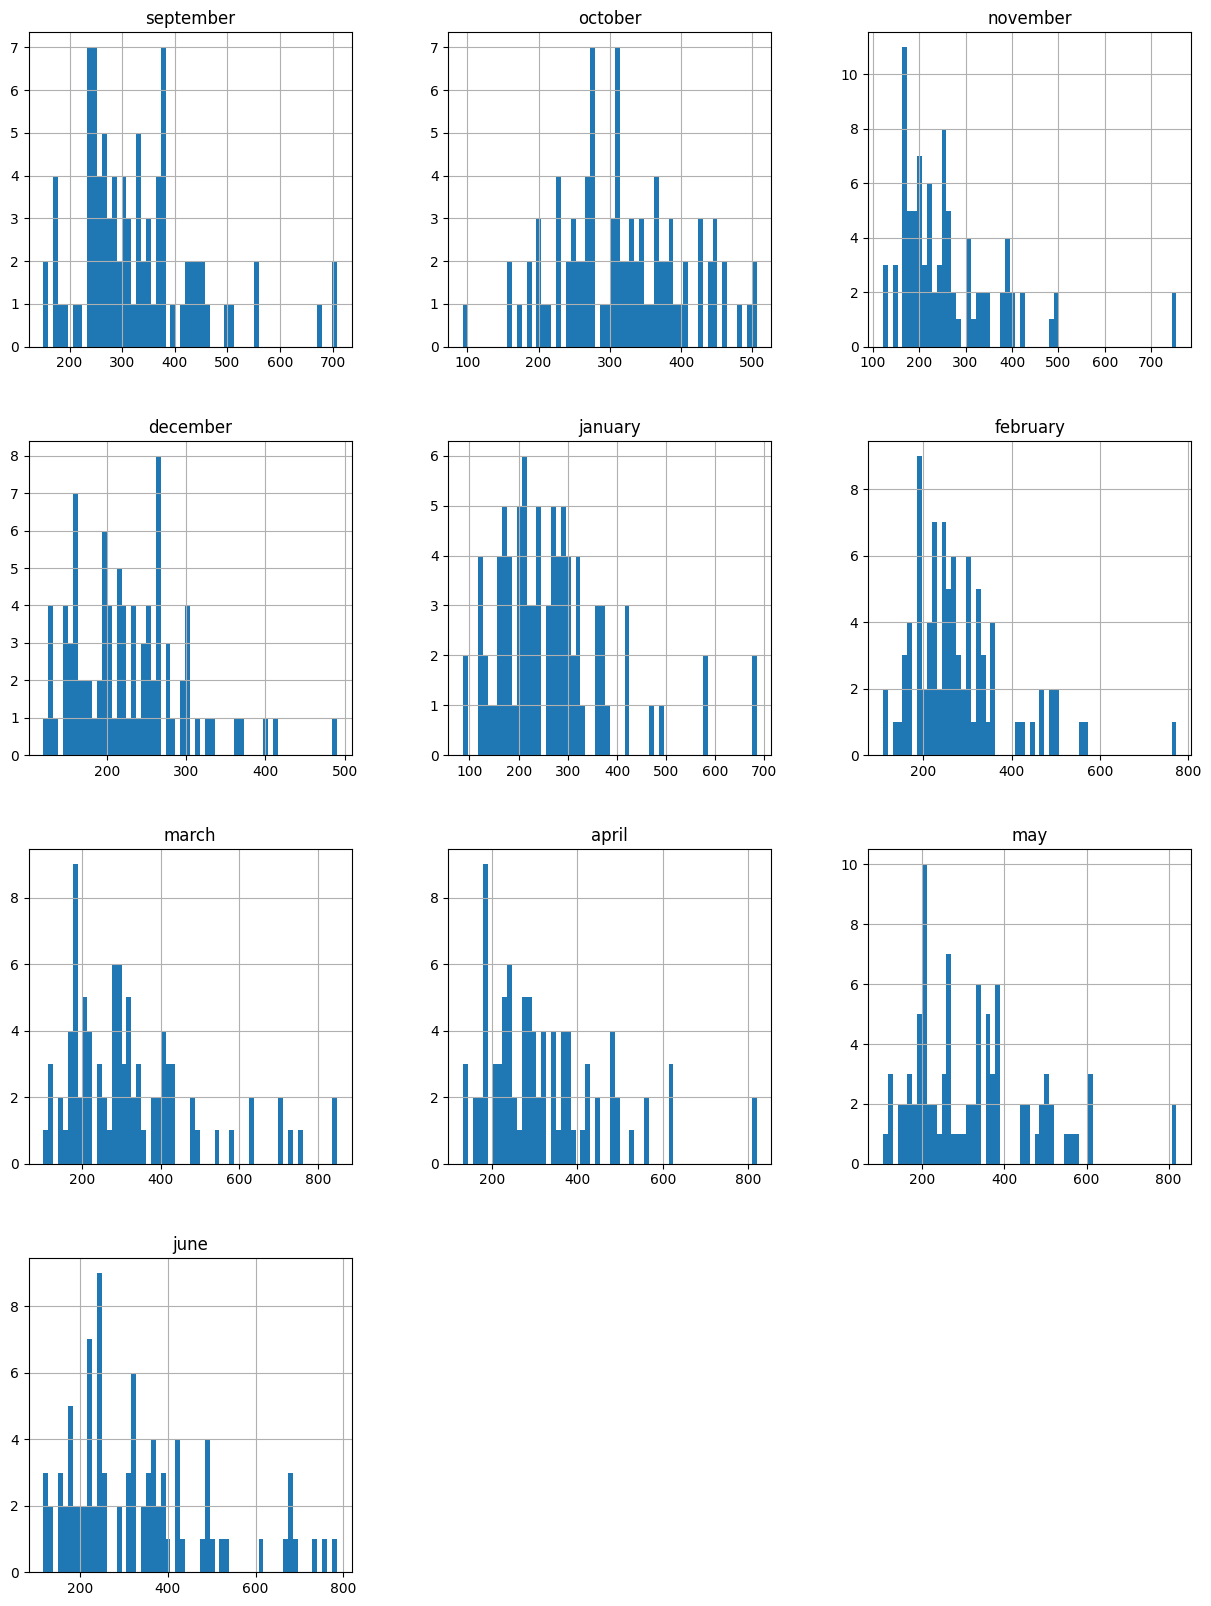

In [21]:
market_prices.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)